Using a dataset of your choice: 
1. Select an outcome variable 
    * price
2. Pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. 
    * Categorical: type, region
    * Continuous: bedrooms, bathrooms, building area, car spots
3. Explore the variables using the univariate and bivariate methods you've learned so far.
4. Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.
5. Finally, use filtering methods to select the five best features and justify your choices.

    * [California Dataset](https://www.kaggle.com/harrywang/housing#housing.csv)
    * [Melbourne Datatset](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [3]:
#housing = pd.read_csv('housing.csv')
housing = pd.read_csv('Melbourne_housing_FULL.csv') 

# Univariate Exploration

In [4]:
print(housing.head())
#select out the no-price entries
housing.info()

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode      ...       Bathroom  Car  Landsize  \
0  3/09/2016       2.5    3067.0      ...            1.0  1.0     126.0   
1  3/12/2016       2.5    3067.0      ...            1.0  1.0     202.0   
2  4/02/2016       2.5    3067.0      ...            1.0  0.0     156.0   
3  4/02/2016       2.5    3067.0      ...            2.0  1.0       0.0   
4  4/03/2017       2.5    3067.0      ...            2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea Lattitude  Longtitude  \
0           NaN        NaN

* Suburb: Suburb
* Address: Address
* Rooms: Number of rooms
* Price: Price in Australian dollars
* Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
* Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
* SellerG: Real Estate Agent
* Date: Date sold
* Distance: Distance from Central Business District in Kilometres
* Regionname: General Region (West, North West, North, North east ...etc)
* Propertycount: Number of properties that exist in the suburb.
* Bedroom2 : Scraped # of Bedrooms (from different source)
* Bathroom: Number of Bathrooms
* Car: Number of carspots
* Landsize: Land Size in Metres
* BuildingArea: Building Size in Metres
* YearBuilt: Year the house was built
* CouncilArea: Governing council for the area
* Lattitude: Self explanitory
* Longtitude: Self explanitory

There's 34857 entries in this dataset, many are numerical floats, but some are cetgorical objects. There's some missing data in the price, distance, postcode, bedroom2, bathroom, car, land size, building area, yearbuilt, councilarea, lattitude, longitude, region name, and property count variables

# Multivariate exploration

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


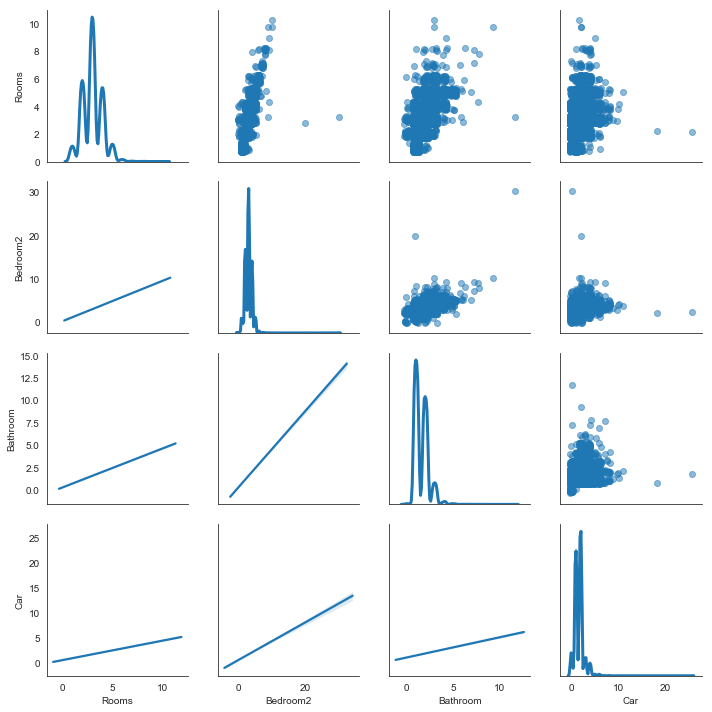

In [17]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Take a subset of the data to make plots clearer.
housing_sel = housing[['Type', 'Rooms', 'Bedroom2', 
                       'Bathroom', 'Car',]]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
housing_jittered = housing_sel.loc[:, 'Rooms':'Car'].dropna()

# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(housing_jittered.shape)),
    columns=housing_jittered.columns
)

# Combine the data and the noise.
housing_jittered = housing_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(housing_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

                  Rooms     Price  Distance  Postcode  Bedroom2  Bathroom  \
Rooms          1.000000  0.465238  0.271511  0.085890  0.946755  0.611826   
Price          0.465238  1.000000 -0.211384  0.044950  0.430275  0.429878   
Distance       0.271511 -0.211384  1.000000  0.481566  0.269524  0.126201   
Postcode       0.085890  0.044950  0.481566  1.000000  0.089292  0.120080   
Bedroom2       0.946755  0.430275  0.269524  0.089292  1.000000  0.614892   
Bathroom       0.611826  0.429878  0.126201  0.120080  0.614892  1.000000   
Car            0.393878  0.201803  0.241835  0.067886  0.388491  0.307518   
Landsize       0.037402  0.032748  0.060862  0.040664  0.037019  0.036333   
BuildingArea   0.156229  0.100754  0.076301  0.042437  0.154157  0.147558   
YearBuilt     -0.012749 -0.333306  0.323059  0.089805 -0.002022  0.167955   
Lattitude      0.004872 -0.215607 -0.100417 -0.231027  0.003447 -0.059183   
Longtitude     0.103235  0.197874  0.200946  0.362895  0.106164  0.106531   

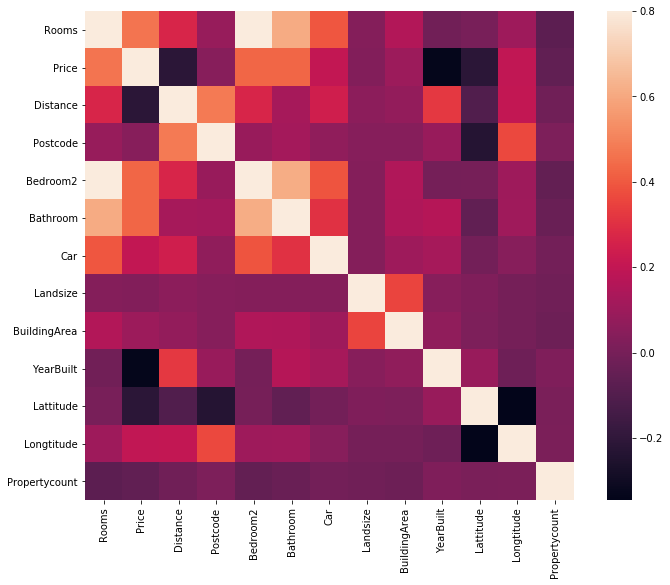

In [5]:
corrmat = housing.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x720 with 0 Axes>

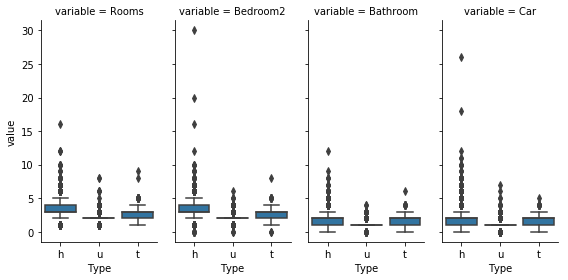

        value                                              
        count      mean       std  min  25%  50%  75%   max
Type                                                       
h     84750.0  2.600861  1.194050  0.0  2.0  3.0  3.0  30.0
t      9409.0  2.416410  0.885116  0.0  2.0  2.0  3.0   9.0
u     20098.0  1.647477  0.712675  0.0  1.0  2.0  2.0   8.0


In [15]:
# Restructure the data so we can use FacetGrid rather than making a boxplot for each variable separately.
housing_long = pd.melt(frame= housing_sel, id_vars= ['Type'], )
#print(housing_long)

plt.figure(figsize= (10,10))
g = sns.FacetGrid(housing_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "Type", "value")
plt.show()

# Descriptive statistics by group.
print(housing_long.groupby('Type').describe())


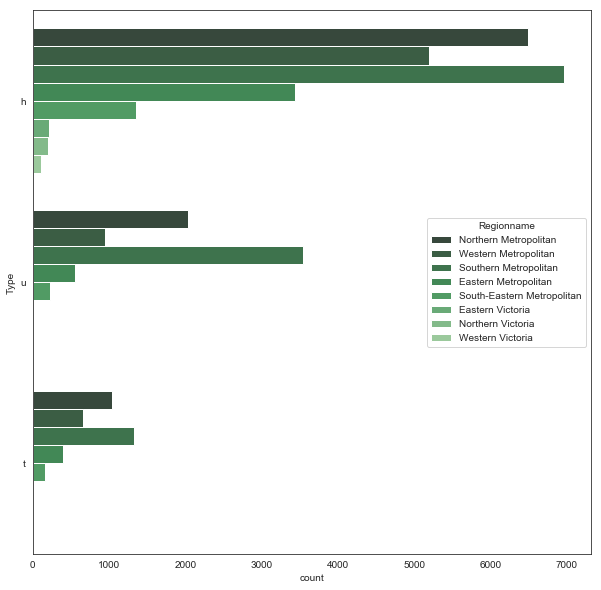

Regionname  Eastern Metropolitan  Eastern Victoria  Northern Metropolitan  \
Type                                                                        
h                           3438               216                   6489   
t                            391                 5                   1035   
u                            548                 7                   2033   

Regionname  Northern Victoria  South-Eastern Metropolitan  \
Type                                                        
h                         199                        1356   
t                           1                         162   
u                           3                         221   

Regionname  Southern Metropolitan  Western Metropolitan  Western Victoria  
Type                                                                       
h                            6968                  5199               113  
t                            1332                   654                 0  
u   

In [34]:
# Add a second categorical variable.
housing_sel2 = housing[['Type','Regionname']]
#housing_sel2.Regionname.unique()

# Plot counts for each combination of levels.
plt.figure(figsize=(10,10))
sns.countplot(y="Type", hue="Regionname", data=housing_sel2, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(housing_sel2['Type'], housing_sel2['Regionname'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

# Feature Engineering

In [43]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(housing)
#print(features.head())

# extra_rooms dummy
features['extra_rooms'] = housing['Rooms'] - housing['Bedroom2'] - housing['Bathroom']

# bed/bath ratio



print(pd.crosstab(features['extra_rooms'], housing['Type']))

Type            h     t     u
extra_rooms                  
-39.0           1     0     0
-18.0           1     0     0
-13.0           2     0     0
-12.0           2     0     0
-9.0            1     0     0
-8.0            4     0     0
-7.0            3     0     0
-6.0           10     1     0
-5.0           85     0     0
-4.0          273    14     6
-3.0         1923   213    37
-2.0         8880  1172   804
-1.0         8945   529  3375
 0.0          245    10    46
 1.0           29     3     1
 2.0            7     0     3
 3.0            4     1     0
 7.0            1     0     0


In [ ]:
# filter method for variance